# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#  

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()
print('=='*20)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train['Sex'].unique()
test['Sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
label_sex = LabelEncoder()

train['Sex']=label_sex.fit_transform(train['Sex'])
test['Sex']=label_sex.fit_transform(test['Sex'])

In [9]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna('S', inplace=True)

test['Age'].fillna(test['Age'].median(), inplace=True)
test['Embarked'].fillna('S', inplace=True)

In [10]:
train_df = train.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'] , axis=1)

In [11]:
test_df = test.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

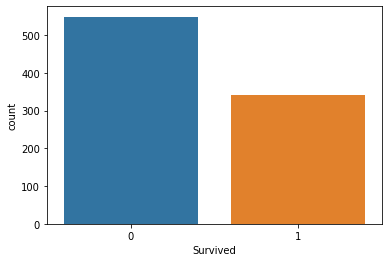

In [12]:
sns.countplot(train['Survived'])

In [13]:
train_enc = train_df.apply(LabelEncoder().fit_transform)
test_df = test_df.apply(LabelEncoder().fit_transform)
train_enc.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,51,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,47,1,0,189,2
4,0,2,1,47,0,0,43,2


In [14]:
X = train_enc.drop(['Survived'], axis=1)
y = train_enc['Survived']

In [15]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,28,1,0,18,2
1,0,0,51,1,0,207,0
2,2,0,34,0,0,41,2
3,0,0,47,1,0,189,2
4,2,1,47,0,0,43,2


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=0.3)

In [17]:
svm = SVC(C=100)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
std = MinMaxScaler()

In [20]:
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)

In [21]:
svm.fit(X_train_scaled, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
print('The train set accuracy using svm: ', svm.score(X_test_scaled, y_test))

The train set accuracy using svm:  0.746268656716418


In [23]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,44,0,0,24,1
1,2,0,60,1,0,5,2
2,1,1,74,0,0,41,1
3,2,1,34,0,0,34,2
4,2,0,27,1,1,46,2


In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gnb = GaussianNB()

gnb.fit(X_train_scaled, y_train)
print('The train set accuracy using GaussianNB: ', gnb.score(X_test_scaled, y_test))

The train set accuracy using GaussianNB:  0.7723880597014925


In [26]:
# CatBoost
from catboost import CatBoostClassifier
clf = CatBoostClassifier()
params = {'iterations': [500],
          'depth': [4, 5, 6],
          'loss_function': ['Logloss', 'CrossEntropy'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
#           'eval_metric': ['Accuracy'],
#           'use_best_model': ['True'],
          'logging_level':['Silent'],
          'random_seed': [42]
         }

In [27]:
clf.fit(X_train_scaled, y_train)

Learning rate set to 0.008417
0:	learn: 0.6867095	total: 89.2ms	remaining: 1m 29s
1:	learn: 0.6802963	total: 90.8ms	remaining: 45.3s
2:	learn: 0.6742176	total: 92.2ms	remaining: 30.6s
3:	learn: 0.6682667	total: 93.7ms	remaining: 23.3s
4:	learn: 0.6628408	total: 94.9ms	remaining: 18.9s
5:	learn: 0.6578548	total: 96ms	remaining: 15.9s
6:	learn: 0.6521340	total: 96.9ms	remaining: 13.8s
7:	learn: 0.6467492	total: 98.1ms	remaining: 12.2s
8:	learn: 0.6417674	total: 99.2ms	remaining: 10.9s
9:	learn: 0.6368035	total: 100ms	remaining: 9.93s
10:	learn: 0.6329286	total: 101ms	remaining: 9.12s
11:	learn: 0.6276279	total: 103ms	remaining: 8.44s
12:	learn: 0.6229000	total: 104ms	remaining: 7.87s
13:	learn: 0.6183927	total: 104ms	remaining: 7.35s
14:	learn: 0.6148327	total: 105ms	remaining: 6.91s
15:	learn: 0.6105228	total: 107ms	remaining: 6.57s
16:	learn: 0.6061591	total: 109ms	remaining: 6.29s
17:	learn: 0.6017065	total: 110ms	remaining: 6s
18:	learn: 0.5993191	total: 111ms	remaining: 5.71s
19:	le

188:	learn: 0.3712239	total: 317ms	remaining: 1.36s
189:	learn: 0.3711705	total: 319ms	remaining: 1.36s
190:	learn: 0.3708184	total: 320ms	remaining: 1.35s
191:	learn: 0.3702660	total: 323ms	remaining: 1.36s
192:	learn: 0.3697178	total: 324ms	remaining: 1.36s
193:	learn: 0.3696793	total: 325ms	remaining: 1.35s
194:	learn: 0.3694556	total: 327ms	remaining: 1.35s
195:	learn: 0.3688870	total: 328ms	remaining: 1.34s
196:	learn: 0.3683858	total: 329ms	remaining: 1.34s
197:	learn: 0.3679909	total: 330ms	remaining: 1.34s
198:	learn: 0.3674132	total: 340ms	remaining: 1.37s
199:	learn: 0.3669103	total: 341ms	remaining: 1.36s
200:	learn: 0.3664983	total: 343ms	remaining: 1.36s
201:	learn: 0.3661533	total: 344ms	remaining: 1.36s
202:	learn: 0.3660810	total: 345ms	remaining: 1.35s
203:	learn: 0.3657140	total: 346ms	remaining: 1.35s
204:	learn: 0.3651920	total: 347ms	remaining: 1.35s
205:	learn: 0.3651164	total: 348ms	remaining: 1.34s
206:	learn: 0.3646972	total: 349ms	remaining: 1.34s
207:	learn: 

453:	learn: 0.3134291	total: 686ms	remaining: 825ms
454:	learn: 0.3132927	total: 690ms	remaining: 827ms
455:	learn: 0.3132301	total: 692ms	remaining: 826ms
456:	learn: 0.3130465	total: 693ms	remaining: 824ms
457:	learn: 0.3129464	total: 695ms	remaining: 822ms
458:	learn: 0.3127533	total: 696ms	remaining: 820ms
459:	learn: 0.3126686	total: 697ms	remaining: 818ms
460:	learn: 0.3124190	total: 698ms	remaining: 816ms
461:	learn: 0.3121978	total: 699ms	remaining: 814ms
462:	learn: 0.3120412	total: 700ms	remaining: 812ms
463:	learn: 0.3119675	total: 701ms	remaining: 810ms
464:	learn: 0.3119067	total: 702ms	remaining: 808ms
465:	learn: 0.3117460	total: 704ms	remaining: 806ms
466:	learn: 0.3116296	total: 706ms	remaining: 806ms
467:	learn: 0.3115733	total: 707ms	remaining: 804ms
468:	learn: 0.3115320	total: 709ms	remaining: 802ms
469:	learn: 0.3114734	total: 710ms	remaining: 801ms
470:	learn: 0.3114140	total: 711ms	remaining: 799ms
471:	learn: 0.3111540	total: 713ms	remaining: 797ms
472:	learn: 

757:	learn: 0.2777900	total: 1.06s	remaining: 338ms
758:	learn: 0.2776449	total: 1.06s	remaining: 337ms
759:	learn: 0.2775822	total: 1.06s	remaining: 335ms
760:	learn: 0.2774781	total: 1.06s	remaining: 334ms
761:	learn: 0.2773389	total: 1.06s	remaining: 332ms
762:	learn: 0.2773312	total: 1.06s	remaining: 331ms
763:	learn: 0.2772683	total: 1.07s	remaining: 329ms
764:	learn: 0.2772068	total: 1.07s	remaining: 328ms
765:	learn: 0.2770909	total: 1.07s	remaining: 326ms
766:	learn: 0.2770040	total: 1.07s	remaining: 325ms
767:	learn: 0.2768665	total: 1.07s	remaining: 323ms
768:	learn: 0.2768113	total: 1.07s	remaining: 323ms
769:	learn: 0.2767506	total: 1.08s	remaining: 322ms
770:	learn: 0.2766817	total: 1.08s	remaining: 320ms
771:	learn: 0.2766095	total: 1.08s	remaining: 319ms
772:	learn: 0.2765273	total: 1.08s	remaining: 318ms
773:	learn: 0.2763898	total: 1.08s	remaining: 316ms
774:	learn: 0.2763783	total: 1.08s	remaining: 315ms
775:	learn: 0.2762947	total: 1.09s	remaining: 314ms
776:	learn: 

In [28]:
print('The train set accuracy using Catboost: ', clf.score(X_test_scaled, y_test))

The train set accuracy using Catboost:  0.7947761194029851


In [29]:
#clf.predict_proba(test_df)

In [30]:
#Predicting the test result

y_pred = clf.predict(test_df)
#Convert all y_pred value into int incase any other type isn't an integer/''
y_pred = list(map(int, y_pred)) 

submission = pd.DataFrame({'Passenger Id': test['PassengerId'], 'Survived': y_pred})
submission.to_csv('Submission.csv', index=False)

In [31]:
submission.head(10)

,Passenger Id,Survived
0,892,1
1,893,0
2,894,1
3,895,1
4,896,0
5,897,1
6,898,1
7,899,0
8,900,1
9,901,0
